In [7]:
import pandas as pd
import os
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_theme()

In [4]:
path = 'FinalProjectData'

data = pd.concat([pd.read_csv(os.path.join(path, f)) for f in os.listdir(path) if f.endswith(".csv")])
data

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,5,3,3,4,3,3,3,5,107,Assign to CS
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,5,3,3,4,3,3,3,5,109,Assign to CS
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,4,2,2,3,3,2,3,4,91,Passed
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,3,2,2,3,3,2,3,4,80,Flagged
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,3,2,2,3,3,2,3,4,77,Flagged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,1,3,5,2,2,4,4,79,Flagged
2944,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,3,1,2,4,2,2,3,3,71,Flagged
2945,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,2,1,3,4,2,2,3,3,74,Flagged
2946,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,3,1,3,5,2,2,4,3,77,Flagged


# 1 Treatment effect

To simulate the regulations that prevent data snooping in regulated industries, we will clearly define our tests before observing or analyzing the data. The goal is to determine if the treatment ( $\text{TxGroup} == \text{Treatment}$, which will be our preprocessing step ) has an effect on schizophrenia over time, as measured by the PANSS score ( $\text{PANSS\_Total}$ ). So, we want to see if there is a change in $\text{PANSS\_Total}$ over time, which can be determined by looking for a corrilation between $\text{VisitDay}$ and $\text{PANSS\_Total}$ using a linear regression model:

$$\text{PANSS\_Total}=\hat{\beta_0}+\hat{\beta_1}\text{VisitDay}$$

Our null hypothosis is that the treatment has no effect, and if see a P-score $<0.05$ for the 

In [5]:
smf.ols("PANSS_Total ~ VisitDay", data=data[data["TxGroup"] == "Treatment"]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     5389.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:40:33   Log-Likelihood:                -46745.
No. Observations:               11249   AIC:                         9.349e+04
Df Residuals:                   11247   BIC:                         9.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8730      0.203    397.726      0.000      80.474      81.272
VisitDay      -0.1134      0.002    -73.407      0.000      -0.116      -0.110
==============================================================================
Omnibus:                      140.534   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.709
Skew:                           0.266   Prob(JB):                     1.39e-32
Kurtosis:                       3.175   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='VisitDay', ylabel='PANSS_Total'>

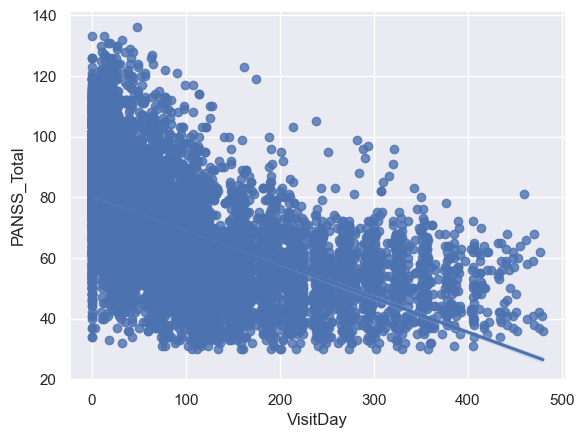

In [8]:
sns.regplot(x="VisitDay", y="PANSS_Total", data=data[data["TxGroup"] == "Treatment"])

This shows a p-value well below $0.05$ for a nonzero $\hat{beta}_0$, so we reject the null hypothosis and can say that the treatment plan does improve the PANSS score over time. Aditionally, the coefficent $\hat{\beta}_1\approx 0.1134$ indicates that the treatment will decrease the PANSS score by approximatly $0.1134$ every day.

In [10]:
smf.ols("PANSS_Total ~ VisitDay", data=data[data["TxGroup"] == "Control"]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5982.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:43:28   Log-Likelihood:                -48474.
No. Observations:               11660   AIC:                         9.695e+04
Df Residuals:                   11658   BIC:                         9.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.3879      0.199    414.998      0.000      81.999      82.777
VisitDay      -0.1208      0.002    -77.346      0.000      -0.124      -0.118
==============================================================================
Omnibus:                      297.569   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.744
Skew:                           0.312   Prob(JB):                     1.72e-84
Kurtosis:                       3.636   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='VisitDay', ylabel='PANSS_Total'>

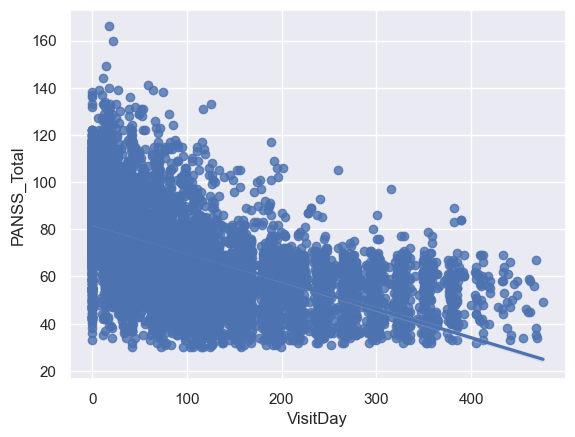

In [9]:
sns.regplot(x="VisitDay", y="PANSS_Total", data=data[data["TxGroup"] == "Control"])

We can say with statistical significant that the control treatment is more effective than the new treatment, with a $\hat{\beta'}_1\approx -0.1208$ versus $\hat{\beta}_1\approx 0.1134$, however that does not mean that the new treatment is inneffecitve. For example, if it has other advantages like few side effects or lower cost, preventing the control treatment from being on option, this study showing the efficacy of the new treatment could be critical information. Overall, it is not more effective / an improvment over the control, however **it is effective**.